# Ecuaciones Diferenciales Parciales
Del conjunto de funciones que representan a las ecuaciones diferenciales ordinarias, existe un subconjunto de paricular de ecuaciones diferenciales parciales de segundo orden cuya forma es:
$$A\frac{\partial^2u}{\partial x^2}+B\frac{\partial^2u}{\partial x\partial y}+C\frac{\partial^2u}{\partial y^2}+D\frac{\partial u}{\partial x}+E\frac{\partial u}{\partial y}+Fu=G$$

donde $A,B,C,D,E,G$ son funciones de $x$ y $y$. Es posible clasificar estas ecuaciones como:

$$\begin{array}{lr}
hiperbólicas & B^2-4AC>0\\
parabólicas &  B^2-4AC=0\\
elípticas &  B^2-4AC<0\\
\end{array}$$

Las ecuaciones hiperbólicas se utilizan normalmente cuando se presentan fenómenos de propagación de ondas, como luz o sonido. Las parabolicas se utilian para describir fenómenos de difusión y transporte como calor o concentración. Las elípticas se pueden encontrar aplicadas a estudiar estados de equilibrio como en el caso de potencailes electroestáticos o distribución de temperaturas en estados estacionarios.

# __________________________________________________________________________________________
## Ecuación de Calor
La ecuación de transmisión de calor en una dimensión se escrita como 
$$c\frac{\partial^2u}{\partial x^2}+\frac{\partial u}{\partial t}$$
con condiciones a la frontera $u(0,t)=u_1$ y $u(a,t)=u_2$ para $t>0$ y una condición inicial $u(x,0)=f(x)$ con $0<x<a$.

### Método explicito de diferencias finitas
Es posible discretizarla por medio de la aproximación por diferencias finitas centradas como
$$\frac{\partial^2u}{\partial x^2}\approx \frac{1}{h^2}[u(x+h,t)-2u(x,t)+u(x-h,t)]$$
y la aproximación por diferencias finitas hacia adelante:
$$\frac{\partial u}{\partial t}\approx \frac{1}{k}[u(x,t+k)-u(x,t)]$$
obteniendo una expresión para la función evaluada en una posición $i+1$ y un tiempo $j+1$ como
$$u_{i}^{j+1}=\lambda u_{i+1}^{j}+(1-2\lambda)u_i^j+\lambda u_{i-1}^{j}$$
 donde $\lambda=ck/h^2$.
La representación de esta ecuación está en un espacio que depende de $x$, la variables espacial, y $t$ la variable temporal y cuya solución está limitada por las condiciones a la frontera e iniciales. En el caso de la variable espacial, $x$ solo puede solucionarse entre los valores $x=0$ y los valores $x=a$; mientras que para la variable temporal las soluciones estana cotadas para cualquier tiempo $t\geq0$ como se muestra en la figura.

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/f687195f4bfbd6c150a141b6d794f917176c4162/Clases/Imagenes/EDP1.png?raw=true" width="300">
<center>

Para poder solucionar numericamente esta ecuación se utilizan los valores de las diferencias finitas centradas en $i-1,\,i$ e $i+1$ para algun $j$ con el objetivo de calcular la solución en $j+1$ para cualquier $i$. Un esquema representativo de este procedimiento se muestra en la figura

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/f687195f4bfbd6c150a141b6d794f917176c4162/Clases/Imagenes/EDP2.png?raw=true" width="300">
<center>    


### Ejemplo:
Considera el problema con valores a la frontera:
$$\begin{array}{lll} \frac{\partial^2u}{\partial x^2}=\frac{\partial u}{\partial t}, & 0<x<1,&\;0<t<0.5\\
u(0,t)=0,& u(1,t), &0\leq t\leq 0.5\\
u(x,0)=\text{sen}\,\pi x,&0\leq x\leq1
\end{array}$$

En este caso $c=1$, $a=1$ y $T=0.5$. Supongamos $n=5$ y $m=50$ tal que $h=1/5$, $k=0.5/50$ y $\lambda=0.25$. Entonces $x_i=i\frac{1}{5}$ para $i=0,1,2,3,4,5$ y $t_j=j\frac{1}{100}$ para $j=0,1,2,...,50$. Graficar la solución.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros del problema
c = 1           # Coeficiente de la ecuación
a = 1           # Longitud del dominio espacial
T = 0.5         # Tiempo final

n = 5           # Número de divisiones espaciales
m = 50          # Número de divisiones temporales
h = a / n       # Tamaño del paso espacial
k = T / m       # Tamaño del paso temporal
lmbda = c**2 * k / h**2  # Parámetro lambda

# Verificación de la estabilidad (comentado como en MATLAB)
# if lmbda > 0.5:
#     print('Warning: El esquema puede ser inestable. Considere reducir k o aumentar h.')

# Creación de la malla
x = np.linspace(0, a, n+1)    # Puntos espaciales (0 a 1 con n+1 puntos)
t = np.linspace(0, T, m+1)    # Puntos temporales (0 a 0.5 con m+1 puntos)

# Inicialización de la solución
u = np.zeros((n+1, m+1))      # Matriz para almacenar la solución

# Condición inicial
u[:, 0] = np.sin(np.pi * x)   # u(x,0) = sen(πx)

# Condiciones de frontera
u[0, :] = 0                   # u(0,t) = 0
u[-1, :] = 0                  # u(1,t) = 0

# Método de diferencias finitas explícito
for j in range(m):
    for i in range(1, n):
        u[i, j+1] = u[i, j] + lmbda * (u[i+1, j] - 2*u[i, j] + u[i-1, j])

# Gráfica de contorno (x vs t)
plt.figure()
cont = plt.contourf(t, x, u, levels=5, cmap='jet')
plt.colorbar(cont)
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.title('Mapa de contorno: Distribución de temperatura u(x,t)')

# Gráfica de superficie 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T_grid, X_grid = np.meshgrid(t, x)
surf = ax.plot_surface(T_grid, X_grid, u, cmap='jet', edgecolor='none')
fig.colorbar(surf)
ax.set_xlabel('Tiempo t')
ax.set_ylabel('Posición x')
ax.set_zlabel('Temperatura u(x,t)')
ax.set_title('Solución numérica de la ecuación del calor')
ax.view_init(30, 45)

# Gráfica de evolución temporal
plt.figure()
plt.plot(x, u[:, 0], 'b-', linewidth=2, label='t=0')
plt.plot(x, u[:, round(m/4)], 'r-', linewidth=2, label=f't={t[round(m/4)]:.2f}')
plt.plot(x, u[:, round(m/2)], 'g-', linewidth=2, label=f't={t[round(m/2)]:.2f}')
plt.plot(x, u[:, -1], 'k-', linewidth=2, label=f't={T:.2f}')
plt.xlabel('Posición x')
plt.ylabel('Temperatura u(x,t)')
plt.title('Evolución temporal de la solución')
plt.legend()
plt.grid(True)

plt.show()

## Método de Crank-Nicholson
Introducido por J. Crank y P. Nicholson en 1947, se usa más que nada para resolver la ecuación de calor. El algoritmo consiste en remplazar la segunda derivada parcial en $c\frac{\partial^2u}{\partial x^2}=\frac{\partial u}{\partial t}$ por un promedio de los cocientes en diferencias centrales, uno se evalúa en $t$ y el otro en $t+k$:
$$\frac{c}{2}\left[ \frac{u(x+h,t)-2u(x,t)+u(x-h,t)}{h^2}+\frac{u(x+h,t+k)-2u(x,t+k)+u(x-h,t+k)}{h^2} \right]=\frac{1}{k}[u(x,t+k)-u(x,t)]$$
donde de  nuevo $\lambda=ck/h^2$
$$-u_{i-1}^{j+1}+\alpha u_{i}^{j+1}-u_{i+1}^{j+1}=u_{i+1}^{j}-\beta u_i^j+u_{i-1}^j$$
donde $\alpha=2(1+1/\lambda)$ y $\beta=2(1-1/\lambda)$ para $j=0,1,...,m-1$ e $i=0,1,...,n-1$. Esquematicamente, se calcula un punto intermedio entre $j$ y $j+1$.

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/f687195f4bfbd6c150a141b6d794f917176c4162/Clases/Imagenes/EDP3.png?raw=true" width="300">
<center> 

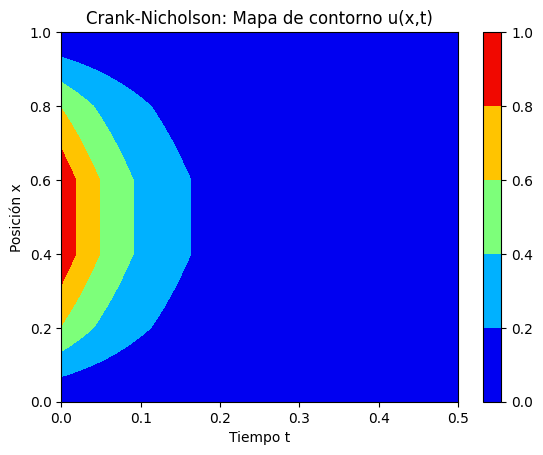

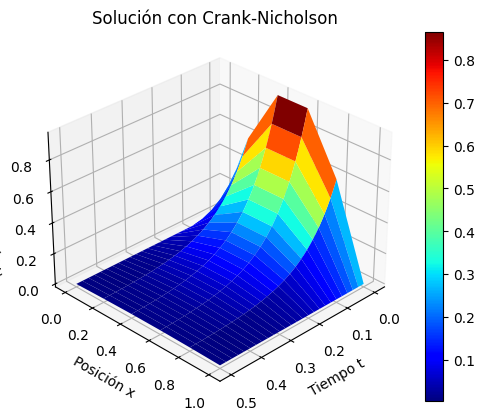

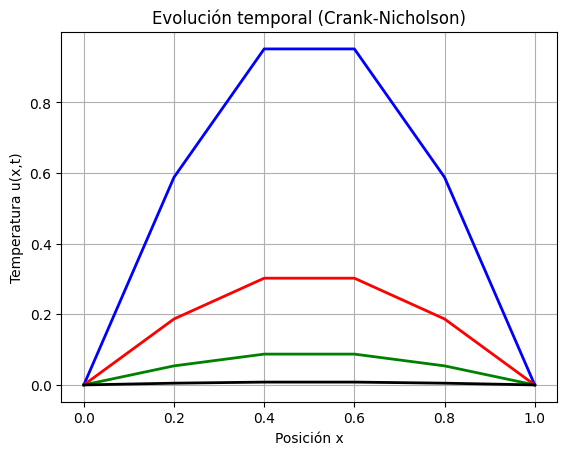

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros del problema
c = 1           # Coeficiente de la ecuación
a = 1           # Longitud del dominio espacial
T = 0.5         # Tiempo final

n = 5           # Número de divisiones espaciales
m = 50          # Número de divisiones temporales
h = a / n       # Tamaño del paso espacial
k = T / m       # Tamaño del paso temporal
lmbda = c**2 * k / (2 * h**2)  # Parámetro lambda para Crank-Nicholson

# Creación de la malla
x = np.linspace(0, a, n+1)    # Puntos espaciales
t = np.linspace(0, T, m+1)    # Puntos temporales

# Inicialización de la solución
u = np.zeros((n+1, m+1))      # Matriz para almacenar la solución

# Condición inicial
u[:, 0] = np.sin(np.pi * x)   # u(x,0) = sen(πx)

# Condiciones de frontera
u[0, :] = 0                   # u(0,t) = 0
u[-1, :] = 0                  # u(1,t) = 0

# Construcción de las matrices del sistema
main_diag = (1 + 2*lmbda) * np.ones(n-1)
off_diag = -lmbda * np.ones(n-2)

# Matriz A
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

# Matriz B
B = np.diag((1 - 2*lmbda) * np.ones(n-1)) + np.diag(lmbda * np.ones(n-2), k=1) + np.diag(lmbda * np.ones(n-2), k=-1)

# Resolución del sistema en cada paso de tiempo
for j in range(m):
    # Término independiente
    b = B @ u[1:-1, j]
    
    # Resolución del sistema lineal (usando solve en lugar del operador \ de MATLAB)
    u[1:-1, j+1] = np.linalg.solve(A, b)

# Gráfica de contorno
plt.figure()
cont = plt.contourf(t, x, u, levels=5, cmap='jet')
plt.colorbar(cont)
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.title('Crank-Nicholson: Mapa de contorno u(x,t)')

# Gráfica de superficie 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T_grid, X_grid = np.meshgrid(t, x)
surf = ax.plot_surface(T_grid, X_grid, u, cmap='jet', edgecolor='none')
plt.colorbar(surf)
ax.set_xlabel('Tiempo t')
ax.set_ylabel('Posición x')
ax.set_zlabel('Temperatura u(x,t)')
ax.set_title('Solución con Crank-Nicholson')
ax.view_init(30, 45)

# Gráfica de evolución temporal
plt.figure()
plt.plot(x, u[:, 0], 'b-', linewidth=2, label='t=0')
plt.plot(x, u[:, round(m/4)], 'r-', linewidth=2, label=f't={t[round(m/4)]:.2f}')
plt.plot(x, u[:, round(m/2)], 'g-', linewidth=2, label=f't={t[round(m/2)]:.2f}')
plt.plot(x, u[:, -1], 'k-', linewidth=2, label=f't={T:.2f}')
plt.xlabel('Posición x')
plt.ylabel('Temperatura u(x,t)')
plt.title('Evolución temporal (Crank-Nicholson)')
# plt.legend(loc='northeast')
plt.grid(True)

plt.show()

### _Ejercicio 1_
Resuleve el siguiente problema con valores a la frontera

$\begin{array}{lll} \frac{\partial^2u}{\partial x^2}=\frac{\partial u}{\partial t}, & 0<x<2,&\;0<t<1\\
u(0,t)=0,& u(2,t)=0, &0\leq t\leq 1\\
u(x,0)=\left\{\begin{array}{l}1,\\0,\end{array}\right.&\begin{array}{l} 0\leq x\leq1\\1<x\leq 2\end{array}
\end{array}$

usando $n=8$ y $m=40$

# _____________________________________________
## Ecuación de Onda
La ecuación que representa movimientos oscilatorios en una dimensión $u(x,t)$ como:

$$c^2\frac{\partial^2u}{\partial x^2}=\frac{\partial^2u}{\partial t^2}$$

Esta ecuación se puede discretizar con diferencias finitas por medio de:

$\frac{\partial^2u}{\partial x^2}\approx \frac{1}{h^2}[u(x+h,t)-2u(x,t)+u(x-h,t)]$

$\frac{\partial^2u}{\partial t^2}\approx \frac{1}{k^2}[u(x,t+k)-2u(x,t)+u(x,t-k)]$

y sustituyendo obtenemos el valor de la función en un tiempo posterior

$u_{i}^{j+1}=\lambda^2\, u_{i+1}^{j}+2\,(1-\lambda^2)\,u_i^j+\lambda^2\, u_{i-1}^{j}-u_i^{j-1}\qquad(1)$

para $i=1,2,...,n-1$ y $j=1,2,...,m-1$. Una forma de ver el cálculo en la malla es la siguiente:

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/abfe7def5cd006c26b52078955ca4a2cd22be405/Clases/Imagenes/EDP4.png?raw=true" width="300">
<center> 
    
y donde las condiciones a la frontera $u_0^j=u(0,t_j)=0$ y $u_n^j=u(a,t_j)=0$ y la condición inicial $u_i^0=u(x_i,0)=f(x_i)$. Estas condiciones no determinan el valor de la función en $u_i^{j=1}$, el valor que esta "enmedio". Para resolver este problema usamos la discretización de la función de la condicion inicial como:

$f(x_i)=u(x_i,0)\approx\frac{u(x_i,t_{j+1})-u(x_i,t_{j-1})}{2k}\qquad(2)$

es decir, la función de$f(x_i)$ alrededor del tiempo  (en . Esto supone que podemos calcular la función para un tiempo $t=-1$ (en $t_{j-1}$), es decir, hacia el pasado.
Despejando esta la ecuación (2) en el caso de la condición inicial (en $t=0$):

$u_i^{-1}=u_i^1-2kf(x_i)$

y sustituyendo en la ecuación (1):

$u_{i}^{1}=\frac{\lambda^2}{2}\, (u_{i+1}^{0}+u_{i-1}^0)+(1-\lambda^2)\, u_{i}^{0}+k\,f(x_i)\qquad(3)$

### Ejemplo

Aproximar la solución del problema con valores a la frontera

$\begin{array}{lll} 4\frac{\partial^2u}{\partial x^2}=\frac{\partial^2 u}{\partial t^2}, & 0<x<1,&\;0<t<1\\
u(0,t)=0,& u(1,t)=0, &0\leq t\leq 1\\
u(x,0)=\text{sen}\,\pi x,&\frac{\partial u}{\partial t}\left|_{t=0}\right.=0&0\leq x\leq1
\end{array}$

con $n=5$ y $m=20$. Donde $c=2$, $a=1$ y $T=1$. Por lo que $h=1/5$, $h=1/20$ y $\lambda=0.5$.

Para ello hay que identificar los valores $u_i^1$de la ecuación (3) para poder aplicar la ecuación (1)

$u_i^1=\frac{0.5^2}{2}(u_{i+1}^0+u_{i-1}^0)+(1-0.5^2)u_i^0+0.05\cdot0$

donde la ecuación $f(x=0)=\text{sen}\,\pi x|_{x=0}=0$. Entonces la ecuación para calcular las soluciones numericamente es:

$u_i^{j+1}=0.25\,u_{i+1}^j+1.5\,u_i^j+0.25\,u_{i-1}^j-u_i^{j-1}$

para $i=1,2,3,4$

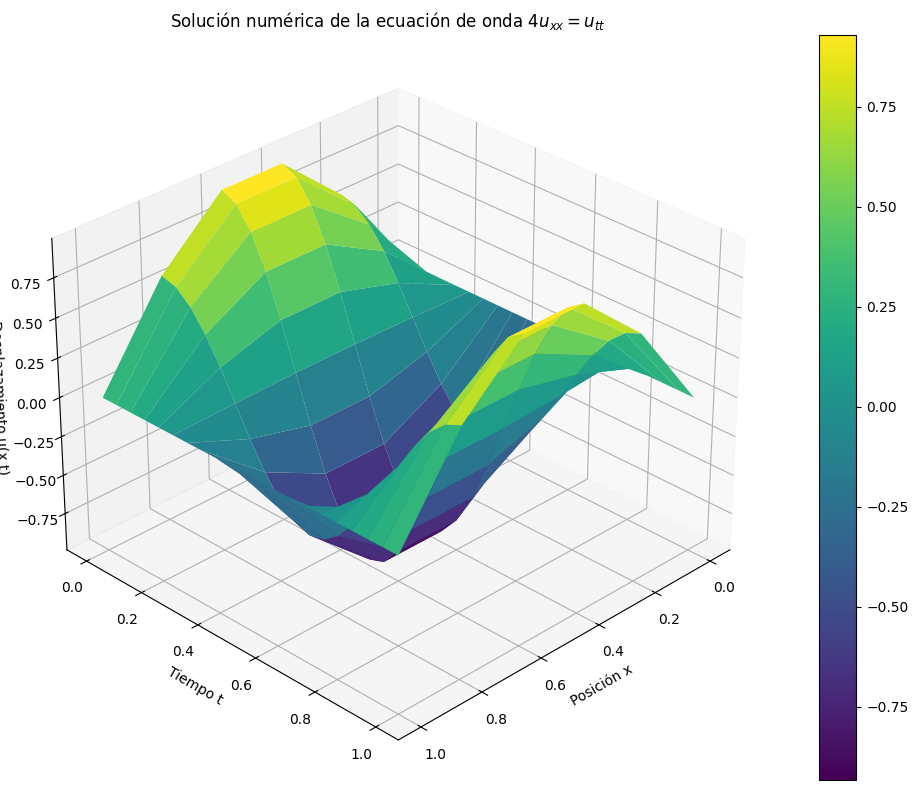

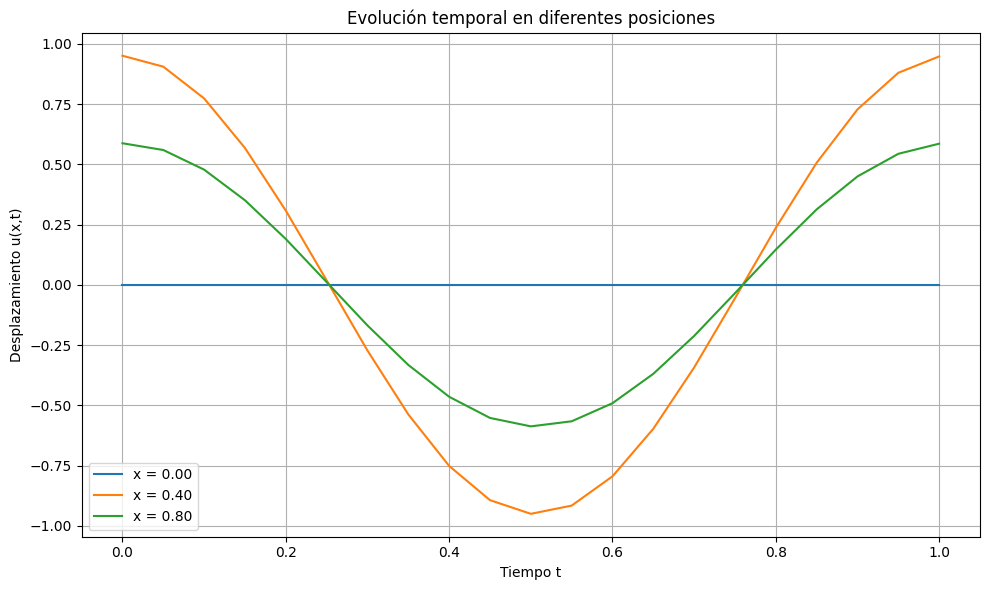

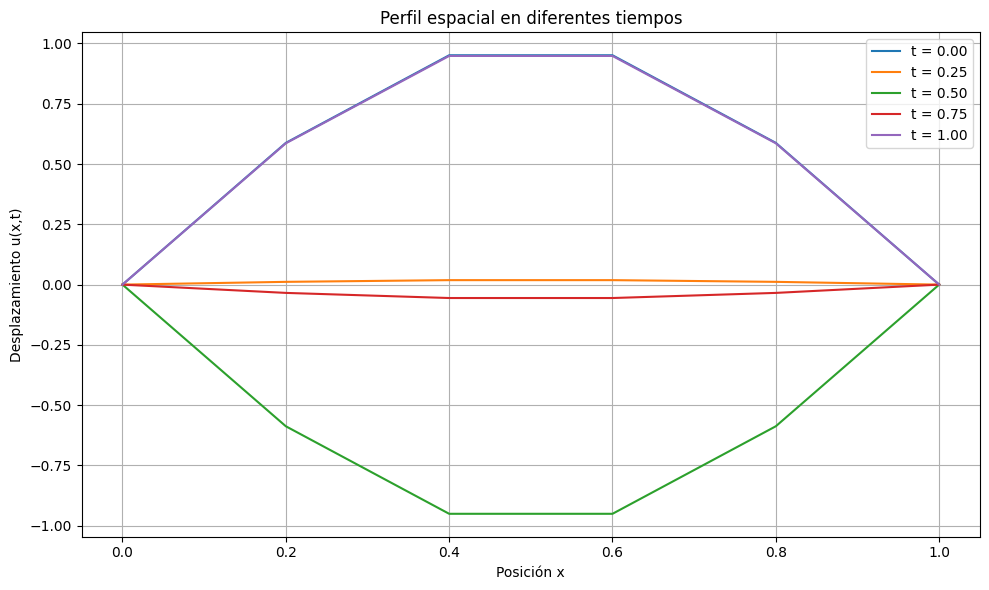

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros del problema
c = 2           # Velocidad de la onda
a = 1           # Longitud del dominio espacial
T = 1           # Tiempo final

n = 5           # Número de puntos espaciales (x)
m = 20          # Número de puntos temporales (t)

h = a / n       # Paso espacial
k = T / m       # Paso temporal
lambda_val = 0.5  # Parámetro lambda = c*k/h

# Crear mallas
x = np.linspace(0, a, n+1)   # Puntos espaciales
t = np.linspace(0, T, m+1)   # Puntos temporales

# Inicializar matriz de solución u(x,t)
u = np.zeros((n+1, m+1))

# Condición inicial u(x,0) = sen(πx)
u[:, 0] = np.sin(np.pi * x)

# Condición inicial de velocidad du/dt(x,0) = 0
# Usamos la aproximación para la primera fila temporal (j=1)
for i in range(1, n):
    u[i, 1] = (lambda_val**2)/2 * (u[i+1, 0] + u[i-1, 0]) + (1 - lambda_val**2)*u[i, 0] + k*0

# Aplicar el esquema de diferencias finitas
for j in range(1, m):
    for i in range(1, n):
        u[i, j+1] = 0.25*u[i+1, j] + 1.5*u[i, j] + 0.25*u[i-1, j] - u[i, j-1]

# Graficar la solución 3D
X, T_mesh = np.meshgrid(x, t)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T_mesh, u.T, cmap='viridis')
ax.set_xlabel('Posición x')
ax.set_ylabel('Tiempo t')
ax.set_zlabel('Desplazamiento u(x,t)')
ax.set_title('Solución numérica de la ecuación de onda $4u_{xx} = u_{tt}$')
fig.colorbar(surf)
ax.view_init(30, 45)
plt.tight_layout()
plt.show()

# Graficar perfil temporal para algunos puntos x
plt.figure(figsize=(10, 6))
for i in range(0, n+1, 2):
    plt.plot(t, u[i, :], linewidth=1.5, label=f'x = {x[i]:.2f}')
plt.xlabel('Tiempo t')
plt.ylabel('Desplazamiento u(x,t)')
plt.title('Evolución temporal en diferentes posiciones')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar perfil espacial para algunos tiempos t
plt.figure(figsize=(10, 6))
for j in range(0, m+1, 5):
    plt.plot(x, u[:, j], linewidth=1.5, label=f't = {t[j]:.2f}')
plt.xlabel('Posición x')
plt.ylabel('Desplazamiento u(x,t)')
plt.title('Perfil espacial en diferentes tiempos')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

### _Ejercicio 2_
Resuleve el prolema con valores a la frontera

$\begin{array}{lll} c^2\frac{\partial^2u}{\partial x^2}=\frac{\partial^2 u}{\partial t^2}, & 0<x<a,&\;0<t<T\\
u(0,t)=0,& u(a,t)=0, &0\leq t\leq T\\
u(x,0)=f(x),&\frac{\partial u}{\partial t}\left|_{t=0}\right.=0&0\leq x\leq a
\end{array}$

con $n=10$ y $m=25$, $c=\sqrt{2}$, $a=1$, $T=1$ y 

$f(x)=\left\{\begin{array}{rr}
0,&0\leq x\leq 0.5\\
0.5&0.5< x\leq 1
\end{array}\right.$

# _____________________________________________
## Ecuación de Laplace

La ecuación que representa movimientos oscilatorios en una dimensión $u(x,t)$ como:

$$\frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2}=0$$

Esta ecuación se puede discretizar con diferencias finitas por medio de:

$\frac{\partial^2u}{\partial x^2}\approx \frac{1}{h^2}[u(x+h,y)-2u(x,y)+u(x-h,y)]$

$\frac{\partial^2u}{\partial y^2}\approx \frac{1}{h^2}[u(x,y+k)-2u(x,y)+u(x,y-k)]$

En este caso tenemos una aproximación que depende d e 5 puntos.

$\, u_{i+1}^{j}+u_i^{j+1}+u_{i-1}^{j}+u_i^{j-1}-4u_i^j=0 \qquad(4)$

y visualizada como en la siguiente figura

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/abfe7def5cd006c26b52078955ca4a2cd22be405/Clases/Imagenes/EDP5.png?raw=true" width="300">
<center> 

donde el punto que queremos calcular es el promedio de los puntos que lo rodean

$u_i^j=\frac{1}{4}\left[  u_{i+1}^{j}+u_i^{j+1}+u_{i-1}^{j}+u_i^{j-1} \right]$

Esto se presenta como un problema si pensamos en como se solucionaron las ecuaciones de calor y de onda. Sin embargo para este tipo de ecuaciones se presenta el problema de Dirichlet para la ecuación de Laplace $\nabla^2u=0$ que establece valores conocido para $u(x,y)$ en la frontera de la región $R$ donde se define el problema. Una visulaización sería como en la siguiente imagen.

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/abfe7def5cd006c26b52078955ca4a2cd22be405/Clases/Imagenes/EDP6.png?raw=true" width="300">
<center> 

La ecuación (4) resulta entonces en un sistema de ecuaciones algebráicas cuyo tamaño depende de la cantidad de puntos son resolver dentro de la malla y diferentes a las condiciones a la frontera, es decir, todos los puntos rosas de la imagen anterior.

## Ejemplo

Aproximar la solución del problema con valores a la frontera

$\begin{array}{lll}
\frac{\partial^2u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=0, & 0<x<2,&\;0<t<2\\
u(0,y)=0,& u(2,y)=y(2-y), &0\leq y\leq 2\\
u(x,0)=0,&u(x,2)=\left\{\begin{array}{l}x,\\2-x\end{array}\right.&\begin{array}{l}0\leq x\leq1\\1\leq x<2\end{array}
\end{array}$

con un tamaño de paso $h=2/3$ por lo que existen 3 puntos ademas del cero en cada uno de los ejes. Al calcular las condiciones a la frontera en el problema de Dirichlet obtenemos valores para los puntos en el controno de la región

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/abfe7def5cd006c26b52078955ca4a2cd22be405/Clases/Imagenes/EDP7.png?raw=true" width="300">
<center> 

Tenemos que resolver el sistema de ecuaciones generado por la ecuación (4) para 4 de los 12 puntos, en donde los puntos  corresponden a las soluciones  de la ecuación (4). EL sistema de ecuaciones entonces queda como:

$\begin{array}{rcrcrcrl}
-4u_1^1&+&u_2^1&+&u_1^2& &&=0\\
u_1^1&-&4u_2^1&+& & &u_2^2&=-\frac{8}{9}\\
u_1^1& & &-&4u_1^2&+&u_2^2&=-\frac{2}{3}\\
 & &u_2^1&+&u_1^2&-&4u_2^2&=-\frac{14}{9}\\
\end{array}$

Condiciones de frontera aplicadas:
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.66666667]
 [0.         0.         0.         0.66666667]
 [0.         0.88888889 0.88888889 0.        ]]
Convergencia alcanzada en 8 iteraciones.


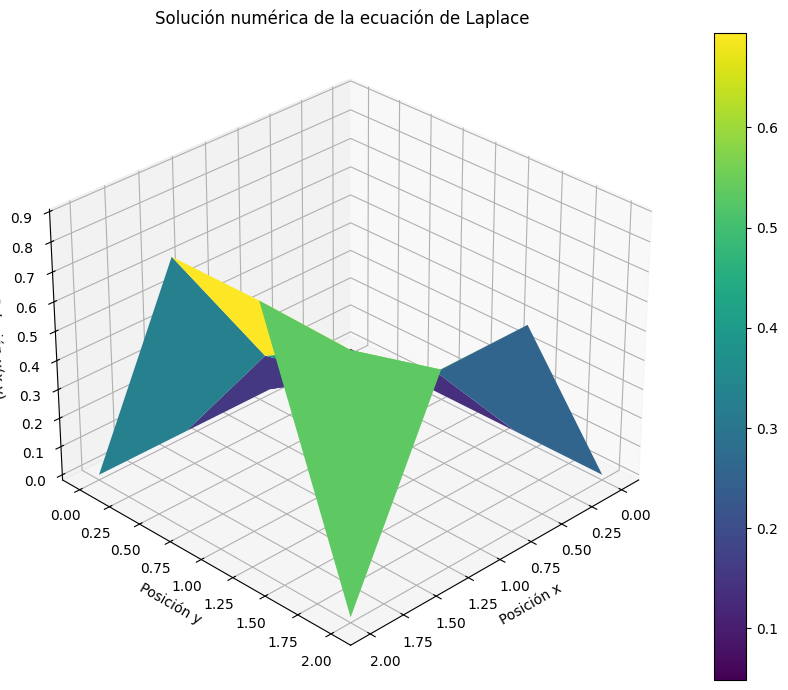

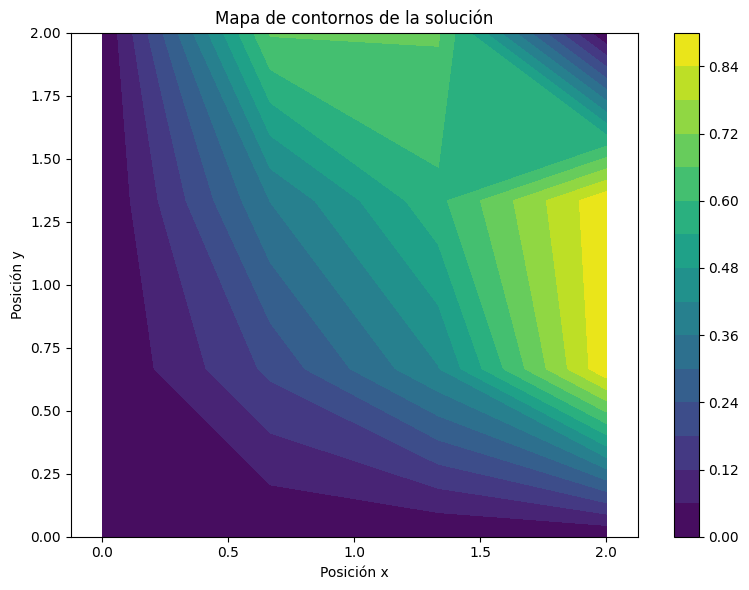

Solución numérica:
[[0.         0.         0.         0.        ]
 [0.         0.19442071 0.36109924 0.66666667]
 [0.         0.4166548  0.5833274  0.66666667]
 [0.         0.88888889 0.88888889 0.        ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Programa para resolver la ecuación de Laplace u_xx + u_yy = 0
# con condiciones de frontera mixtas

# Parámetros del problema
a = 2          # Longitud del dominio en x
b = 2          # Longitud del dominio en y
h = 2/3        # Tamaño de paso

# Crear malla
x = np.arange(0, a + h, h)  # Puntos en dirección x
y = np.arange(0, b + h, h)  # Puntos en dirección y
nx = len(x)    # Número de puntos en x
ny = len(y)    # Número de puntos en y

# Inicializar matriz de solución u(x,y)
u = np.zeros((nx, ny))

# Aplicar condiciones de frontera

# 1. u(0,y) = 0 (frontera izquierda)
u[0,:] = 0

# 2. u(2,y) = y(2-y) (frontera derecha)
u[-1,:] = y*(2-y)

# 3. u(x,0) = 0 (frontera inferior)
u[:,0] = 0

# 4. u(x,2) = función por partes (frontera superior)
for i in range(nx):
    if x[i] <= 1:
        u[i,-1] = x[i]
    else:
        u[i,-1] = 2 - x[i]

# Mostrar condiciones de frontera
print("Condiciones de frontera aplicadas:")
print(u)

# Resolver el sistema usando el método de diferencias finitas
# Para la ecuación de Laplace, usamos el esquema de 5 puntos:
# u(i,j) = (u(i+1,j) + u(i-1,j) + u(i,j+1) + u(i,j-1))/4

max_iter = 1000    # Número máximo de iteraciones
tol = 1e-4         # Tolerancia para convergencia

for iter in range(max_iter):
    u_old = u.copy()
    
    # Actualizar puntos interiores
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i,j] = (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1])/4
    
    # Verificar convergencia
    if np.max(np.abs(u - u_old)) < tol:
        print(f'Convergencia alcanzada en {iter+1} iteraciones.')
        break

# Graficar la solución
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u.T, cmap='viridis')
ax.set_xlabel('Posición x')
ax.set_ylabel('Posición y')
ax.set_zlabel('Solución u(x,y)')
ax.set_title('Solución numérica de la ecuación de Laplace')
fig.colorbar(surf)
ax.view_init(30, 45)  # Ajustar ángulo de vista
plt.tight_layout()
plt.show()

# Graficar contornos
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, u.T, 15, cmap='viridis')
plt.xlabel('Posición x')
plt.ylabel('Posición y')
plt.title('Mapa de contornos de la solución')
plt.colorbar(contour)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Mostrar valores numéricos
print('Solución numérica:')
print(u)

### _Ejercicio 3_

La ecuación de Poission se describe por

$\frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2}=f(x,y)$

y donde su discretización queda de la forma 

$\, u_{i+1}^{j}+u_i^{j+1}+u_{i-1}^{j}+u_i^{j-1}-4u_i^j=h^2f(x,y)$

Analiza la región dada en la siguiente figura donde el tamaño de la malla es de $h=1/8$ y la condición a la frontera (puntos negros) es $u=0$.

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/abfe7def5cd006c26b52078955ca4a2cd22be405/Clases/Imagenes/EDP8.png?raw=true" width="300">
<center>